In [69]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column #reformats structured data for ease in calculations
from tensorflow.keras import layers #to create the layer in the neural network
from sklearn.model_selection import train_test_split #splits the data for us 
from sklearn.metrics import confusion_matrix #calculates the confusion matrix
from sklearn.metrics import accuracy_score #calculates the accuracy score
import matplotlib.pyplot as plt
%matplotlib inline 
#so that plots remains within the cell

In [96]:
#declaring parameters
Number_of_features=5
Number_of_units=1 #indicates number of neurons
#declaring weights and bias
weight=tf.Variable(tf.zeros([Number_of_features,Number_of_units])) #initializing to zero
bias=tf.Variable(tf.zeros([Number_of_units])) #initializing to zero

In [72]:
#defining the perceptron function
def perceptron(x):
    I=tf.add(tf.matmul(x,weight),bias)
    output=tf.sigmoid(I)
    return output

In [111]:
#defining loss function and optimizer 
individual_loss=lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x))))
optimizer=tf.keras.optimizers.Adam(0)

In [95]:
#read in the data
dataframe = pd.read_csv('shuttle_landing_control_data.csv')
dataframe.head(15)

,0,Stablity,Error,Sign,Wind_magnitude,Visiblity,Class
0,1,0,0,0,0,1,1
1,2,0,0,0,0,0,0
2,3,1,1,0,0,0,0
3,4,1,0,0,0,0,0
4,5,1,1,2,0,0,0
5,6,0,0,0,4,0,0
6,7,1,1,0,1,0,1
7,8,1,1,0,2,0,1
8,9,1,1,0,3,0,1
9,10,1,1,1,1,0,1


<function matplotlib.pyplot.show(*args, **kw)>

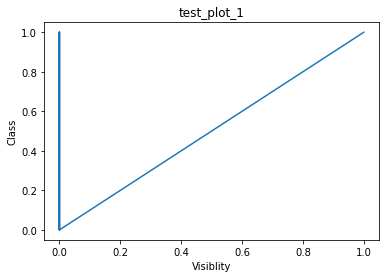

In [94]:
plt.plot(dataframe.Visiblity,dataframe.Class)
plt.title('test_plot_1')
plt.xlabel("Visiblity")
plt.ylabel("Class")
plt.show

In [102]:
#prepating inputs
x_input=dataframe[['Stablity','Error',"Sign","Wind_magnitude","Visiblity"]].values
y_label=dataframe[["Class"]].values

In [104]:
#initializing varaibles

#initializing the variable x
x=tf.Variable(x_input)
 
#changing the datatype of x to 'float32'
x=tf.cast(x,tf.float32)

#creating the vatiable y
y=tf.Variable(y_label)

#changing the datatype of y to 'float32'
y=tf.cast(y,tf.float32)


In [116]:
tf.print(weight,bias)

<tf.Operation 'PrintV2_3' type=PrintV2>

In [112]:
#training the model
for i in range(2):
    optimizer.minimize(individual_loss,[weight,bias])

SystemError: <built-in function TFE_Py_TapeWatch> returned a result with an error set

In [114]:
tf.print(weight,bias)

<tf.Operation 'PrintV2_1' type=PrintV2>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('sonar.csv',header=None)
x=dataset.iloc[:, 0:50].values
y=dataset.iloc[60].values


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
dataset = pd.read_csv('sonar_data.csv')
X = dataset.iloc[:, 0:60].values
y = dataset.iloc[:, 60].values

In [124]:
dataset.head()

,0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [125]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [135]:
classifier = Sequential()

In [136]:
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform', input_dim = 60))
classifier.add(Dropout(rate = 0.1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [137]:
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))

In [138]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [139]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [140]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
155/155 [==============================] - 4s 27ms/sample - loss: -0.4382 - acc: 0.0000e+00
Epoch 2/10
155/155 [==============================] - 0s 662us/sample - loss: -5.5245 - acc: 0.0000e+00
Epoch 3/10
155/155 [==============================] - 0s 2ms/sample - loss: -22.7315 - acc: 0.0000e+00
Epoch 4/10
155/155 [==============================] - 0s 188us/sample - loss: -67.0520 - acc: 0.0000e+00
Epoch 5/10
155/155 [==============================] - 0s 376us/sample - loss: -160.4629 - acc: 0.0000e+00
Epoch 6/10
155/155 [==============================] - 0s 343us/sample - loss: -343.4038 - acc: 0.0000e+00
Epoch 7/10
155/155 [==============================] - 0s 811us/sample - loss: -621.0120 - acc: 0.0000e+00
Epoch 8/10
155/155 [==============================] - 0s 198us/sample - loss: -1084.8198 - acc: 0.0000e+00
Epoch 9/10
155/155 [==============================] - 0s 182us/sample - loss: -1820.5027 - acc: 0.0000e+00
Epoch 10/10
155/155 [==============================] 

In [144]:
y_pred = classifier.predict(X_test) > 0.5
print (y_pred)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [143]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)